In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [18]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [19]:
data = data[pd.isnull(data['height']) == 0 ]
data = data[pd.isnull(data['weight']) == 0 ]

In [11]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

In [20]:
le = LabelEncoder()

In [22]:
le.fit(data['sex'])

LabelEncoder()

In [23]:
y = pd.Series(data = le.transform(data['sex']))

In [24]:
model = LogisticRegression()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100500)

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
predictions = model.predict_proba(X_test)[:, 1]

In [56]:
predictions

array([0.3549968 , 0.99987125, 0.93347224, ..., 0.71356246, 0.20175147,
       0.14874382])

In [66]:
fpr_auto, tpr_auto, thres_auto = roc_curve( y_test, predictions)

In [74]:
tpr_manual = []
fpr_manual = []

for i in range(50, 0, -1):
    
    thres = i / 50
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(predictions, y_test):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr_manual.append(tp / (tp + fn))
    fpr_manual.append(fp / (fp + tn))

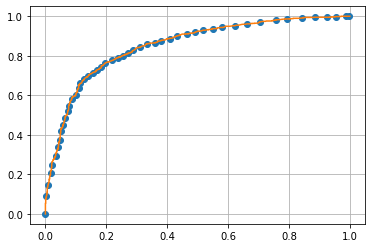

In [77]:
plt.plot(fpr_manual, tpr_manual, 'o')
plt.plot(fpr_auto, tpr_auto)
plt.grid()